In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import requests

## 1) 載入資料集

In [140]:
url = 'https://github.com/1010code/iris-dnn-tensorflow/raw/master/data/Iris.csv'
s=requests.get(url).content
df_train=pd.read_csv(io.StringIO(s.decode('utf-8')))
df_train = df_train.drop(labels=['Id'],axis=1) # 移除Id
df_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## 2) 手動編碼
處理名目資料 (Nominal variables) - 資料前處理
依據特徵資料的特性，可以選擇手動編碼或自動編碼。

### 使用編碼時機?
進行深度學習時，神經網路只能處理數值資料。因此我們需要將所有非數字型態的特徵進行轉換。

ex:

|  Iris-setosa |  Iris-versicolor | Iris-virginica  |
|:---:|:---:|:---:|
|  1 | 2  | 3  |

In [141]:
label_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

#將編碼後的label map存至df_train['Species']中。
df_train['Class'] = df_train['Species'].map(label_map)

In [142]:
df_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Class
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


## 3) 檢查缺失值
使用 numpy 所提供的函式來檢查是否有 NA 缺失值，假設有缺失值使用dropna()來移除。使用的時機在於當只有少量的缺失值適用，若遇到有大量缺失值的情況，或是本身的資料量就很少的情況下建議可以透過機器學習的方法補值來預測缺失值。

```python
# 移除缺失值
train=train.dropna()
```

In [143]:
X = df_train.drop(labels=['Species','Class'],axis=1).values # 移除Species (因為字母不參與訓練)
# checked missing data
print("checked missing data(NAN mount):",len(np.where(np.isnan(X))[0]))

checked missing data(NAN mount): 0


## 資料前處理

In [144]:
import numpy as np
np.set_printoptions(suppress=True)

## Standardization 平均&變異數標準化

In [145]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# scaled之後的資料零均值，單位方差  
print('資料集 X 的平均值 : ', X.mean(axis=0))
print('資料集 X 的標準差 : ', X.std(axis=0))

print('\nStandardScaler 縮放過後資料集 X 的平均值 : ', X_scaled.mean(axis=0))
print('StandardScaler 縮放過後資料集 X 的標準差 : ', X_scaled.std(axis=0))

資料集 X 的平均值 :  [5.84333333 3.054      3.75866667 1.19866667]
資料集 X 的標準差 :  [0.82530129 0.43214658 1.75852918 0.76061262]

StandardScaler 縮放過後資料集 X 的平均值 :  [-0. -0.  0. -0.]
SStandardScaler 縮放過後資料集 X 的標準差 :  [1. 1. 1. 1.]


[Text(0.5, 0, 'PetalWidthCm'), Text(0.5, 1.0, 'distribution of PetalWidthCm')]

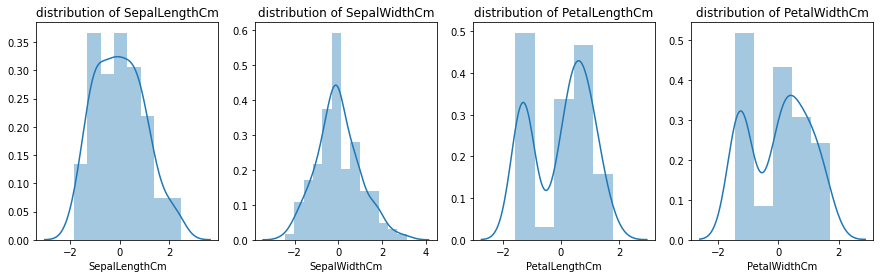

In [146]:
fig, axes = plt.subplots(nrows=1,ncols=4)
fig.set_size_inches(15, 4)
sns.distplot(X_scaled[:,0],ax=axes[0])
sns.distplot(X_scaled[:,1],ax=axes[1])
sns.distplot(X_scaled[:,2],ax=axes[2])
sns.distplot(X_scaled[:,3],ax=axes[3])

axes[0].set(xlabel='SepalLengthCm',title="distribution of SepalLengthCm")
axes[1].set(xlabel='SepalWidthCm',title="distribution of SepalWidthCm")
axes[2].set(xlabel='PetalLengthCm',title="distribution of PetalLengthCm")
axes[3].set(xlabel='PetalWidthCm',title="distribution of PetalWidthCm")

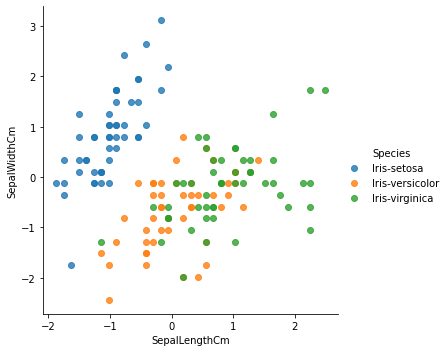

In [150]:
X_scaled=pd.DataFrame(X_scaled,columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
X_scaled['Species']=df_train['Species']
sns.lmplot("SepalLengthCm", "SepalWidthCm", hue='Species', data=X_scaled, fit_reg=False)

## MinMaxScaler 最小最大值標準化

In [126]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1)).fit(X)
X_scaled = scaler.transform(X)

# scaled之後的資料零均值，單位方差  
print('資料集 X 的平均值 : ', X.mean(axis=0))
print('資料集 X 的標準差 : ', X.std(axis=0))

print('\nMinMaxScaler 縮放過後資料集 X 的平均值 : ', X_scaled.mean(axis=0))
print('MinMaxScaler 縮放過後資料集 X 的標準差 : ', X_scaled.std(axis=0))

資料集 X 的平均值 :  [5.84333333 3.054      3.75866667 1.19866667]
資料集 X 的標準差 :  [0.82530129 0.43214658 1.75852918 0.76061262]

StandardScaler 縮放過後資料集 X 的平均值 :  [0.4287037  0.43916667 0.46757062 0.45777778]
SStandardScaler 縮放過後資料集 X 的標準差 :  [0.22925036 0.18006108 0.29805579 0.31692192]


[Text(0.5, 0, 'PetalWidthCm'), Text(0.5, 1.0, 'distribution of PetalWidthCm')]

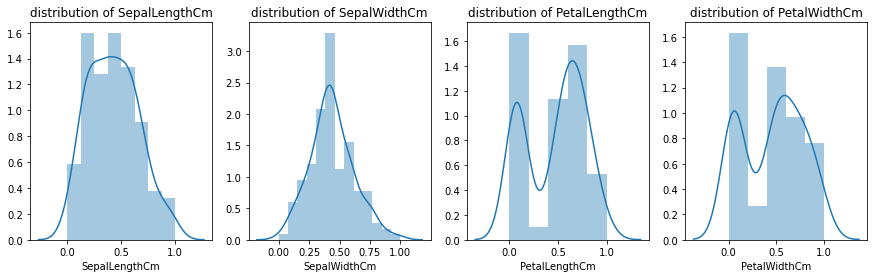

In [127]:
fig, axes = plt.subplots(nrows=1,ncols=4)
fig.set_size_inches(15, 4)
sns.distplot(X_scaled[:,0],ax=axes[0])
sns.distplot(X_scaled[:,1],ax=axes[1])
sns.distplot(X_scaled[:,2],ax=axes[2])
sns.distplot(X_scaled[:,3],ax=axes[3])

axes[0].set(xlabel='SepalLengthCm',title="distribution of SepalLengthCm")
axes[1].set(xlabel='SepalWidthCm',title="distribution of SepalWidthCm")
axes[2].set(xlabel='PetalLengthCm',title="distribution of PetalLengthCm")
axes[3].set(xlabel='PetalWidthCm',title="distribution of PetalWidthCm")

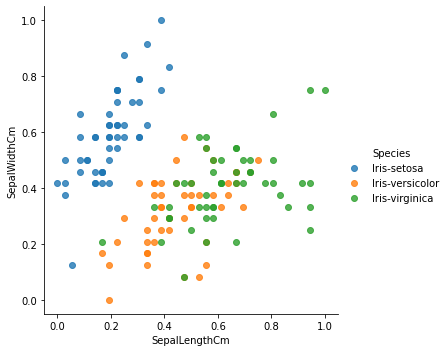

In [128]:
X_scaled=pd.DataFrame(X_scaled,columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
X_scaled['Species']=df_train['Species']
sns.lmplot("SepalLengthCm", "SepalWidthCm", hue='Species', data=X_scaled, fit_reg=False)

## MaxAbsScaler

In [101]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)

# scaled之後的資料零均值，單位方差  
print('資料集 X 的平均值 : ', X.mean(axis=0))
print('資料集 X 的標準差 : ', X.std(axis=0))

print('\nMaxAbsScaler 縮放過後資料集 X 的平均值 : ', X_scaled.mean(axis=0))
print('MaxAbsScaler 縮放過後資料集 X 的標準差 : ', X_scaled.std(axis=0))

資料集 X 的平均值 :  [5.84333333 3.054      3.75866667 1.19866667]
資料集 X 的標準差 :  [0.82530129 0.43214658 1.75852918 0.76061262]

StandardScaler 縮放過後資料集 X 的平均值 :  [0.73966245 0.69409091 0.5447343  0.47946667]
SStandardScaler 縮放過後資料集 X 的標準差 :  [0.10446852 0.09821513 0.2548593  0.30424505]


[Text(0.5, 0, 'PetalWidthCm'), Text(0.5, 1.0, 'distribution of PetalWidthCm')]

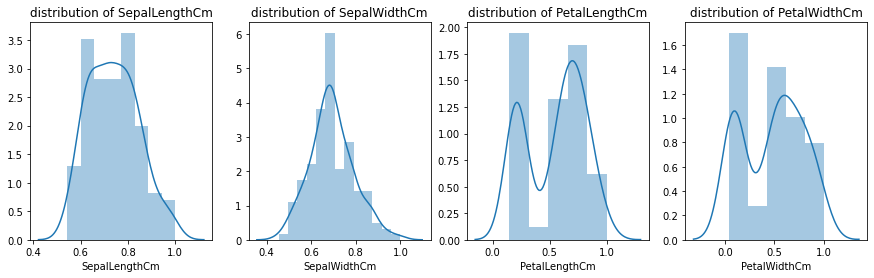

In [102]:
fig, axes = plt.subplots(nrows=1,ncols=4)
fig.set_size_inches(15, 4)
sns.distplot(X_scaled[:,0],ax=axes[0])
sns.distplot(X_scaled[:,1],ax=axes[1])
sns.distplot(X_scaled[:,2],ax=axes[2])
sns.distplot(X_scaled[:,3],ax=axes[3])

axes[0].set(xlabel='SepalLengthCm',title="distribution of SepalLengthCm")
axes[1].set(xlabel='SepalWidthCm',title="distribution of SepalWidthCm")
axes[2].set(xlabel='PetalLengthCm',title="distribution of PetalLengthCm")
axes[3].set(xlabel='PetalWidthCm',title="distribution of PetalWidthCm")

## RobustScaler

In [104]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler().fit(X)
X_scaled = scaler.transform(X)

# scaled之後的資料零均值，單位方差  
print('資料集 X 的平均值 : ', X.mean(axis=0))
print('資料集 X 的標準差 : ', X.std(axis=0))

print('\nRobustScaler 縮放過後資料集 X 的平均值 : ', X_scaled.mean(axis=0))
print('RobustScaler 縮放過後資料集 X 的標準差 : ', X_scaled.std(axis=0))

資料集 X 的平均值 :  [5.84333333 3.054      3.75866667 1.19866667]
資料集 X 的標準差 :  [0.82530129 0.43214658 1.75852918 0.76061262]

StandardScaler 縮放過後資料集 X 的平均值 :  [ 0.03333333  0.108      -0.16895238 -0.06755556]
SStandardScaler 縮放過後資料集 X 的標準差 :  [0.63484715 0.86429316 0.50243691 0.50707508]


[Text(0.5, 0, 'PetalWidthCm'), Text(0.5, 1.0, 'distribution of PetalWidthCm')]

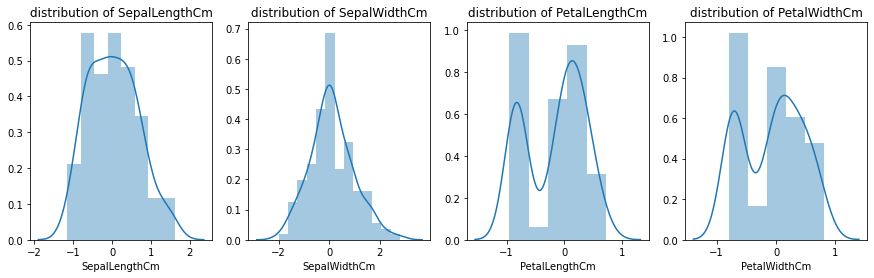

In [105]:
fig, axes = plt.subplots(nrows=1,ncols=4)
fig.set_size_inches(15, 4)
sns.distplot(X_scaled[:,0],ax=axes[0])
sns.distplot(X_scaled[:,1],ax=axes[1])
sns.distplot(X_scaled[:,2],ax=axes[2])
sns.distplot(X_scaled[:,3],ax=axes[3])

axes[0].set(xlabel='SepalLengthCm',title="distribution of SepalLengthCm")
axes[1].set(xlabel='SepalWidthCm',title="distribution of SepalWidthCm")
axes[2].set(xlabel='PetalLengthCm',title="distribution of PetalLengthCm")
axes[3].set(xlabel='PetalWidthCm',title="distribution of PetalWidthCm")